# Clasificación bayesiana

El siguiente notebook es explicativo, preferiblemente usar el servidor de la escuela. 

Utilizaremos el dataset del corpus GeniaMK para polaridad, el corpus GENIA-MK consiste en 1000 abstracts de literatura biomédica anotados con eventos de alto nivel de información que llaman metaconocimiento. Se define metaconocimiento como las diferentes formas en que la información relacionada con la interpretación puede expresarse en un texto.  Entre ellos se encuentra la dimensión polaridad que tiene como objetivo el identificar si un evento describe una situación positiva o negativa. La forma más común en que se presentan estos eventos es con el uso de la palabra no (*not o no*) aunque también considera palabras que expresan que el evento no ocurre como *fail, lack, unable, exception, without*. Algunos ejemplos:


*   CsA was found **not** to inhibit lck gene expression, nor the activity of the lck gene product.

*   In contrast, NF-kappa B p50 alone **fails** to stimulate kappa B-directed transcription, and based on prior in vitro studies, is not directly regulated by I kappa B.

Entonces, existen 2 categorías posibles: positivo (el valor predeterminado) y negativo.
El archivo “genia_lemma.txt” contiene todas las oraciones recolectadas del corpus GENIA-MK y el archivo “polarity_classes.txt” contiene la clasificación para cada oración (son archivos pareados: las líneas corresponden uno a uno entre los dos archivos). 

## Naïve Bayes

Naïve Bayes es uno de los algoritmos más simples y poderosos para la clasificación basado en el Teorema de Bayes con una suposición de independencia entre los predictores. Naive Bayes es fácil de construir y particularmente útil para conjuntos de datos muy grandes.

Existen 3 tipos: 
*   Multinomial: clasificador ampliamente utilizado para la clasificación de documentos que mantiene el recuento de palabras frecuentes presentes en los documentos.
*   Bernoulli: se utiliza para datos discretos, donde las características solo están en forma binaria.
*   Gaussiano: se utiliza cuando se trata de datos continuos y se utiliza la distribución gaussiana.

En este documento implementaremos el Bernoulli y el Multinomial.



### BernoulliNB

Vamos a dividir nuestros datos en un conjunto de entrenamiento y uno para probar que tan bien entreno (70/30 respectivamente), después generamos un vectorizador con CountVectorizer()la función fit() permite entrenar el vectorizador con transform() transformamos nuestros datos a un vector binario una vez entrenado el vectorizador y fit_transform entrena devuelve la vectorización. Después de vectorizar podemos  entrenar nuestro clasificador. 

In [1]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Lectura de archivos de datos
import os

data = pd.read_csv("../data/cvd_transformed.csv")
data.head(6)

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,bmi_clasification,pulse_clasification
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,Peso normal,2
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,Obesidad,4
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,Peso normal,4
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,Sobrepeso,4
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,Peso normal,3
5,8,21914,60.038356,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,40,Sobrepeso,3


In [3]:
# Verificar categorías de clase
data['cardio'].unique()

array([0, 1], dtype=int64)

In [4]:
# Verificar dimensionalidad de datos
data.shape

(61839, 18)

In [5]:
# Preparar datos
# X = sólo datos de características de ejemplos
# y = categorías de clase para cada ejemplo
DataSetX = data.iloc[:, np.r_[2, 8:12, 14:15]]
DataSetY = list(data.iloc[:, 13])  # all rows, label only


DataSetX.to_csv('../data/cvd_nocardio.csv', sep=" ", header=False, index=False)

with open(os.path.join("../data/cvd_nocardio.csv"), mode="r") as dFile:
    DataSetX = [line.rstrip() for line in dFile]


print("Datos")
print(DataSetX[:5])
print("Categorias de clase")
print(DataSetY[:5])

Datos
['50.39178082 1 1 0 0 21.9671201814059', '55.41917808 3 1 0 0 34.9276791584484', '51.6630137 3 1 0 0 23.5078053259871', '48.28219178 1 1 0 0 28.7104793249536', '47.8739726 1 1 0 0 23.0111768573307']
Categorias de clase
[0, 1, 1, 1, 0]


In [6]:
#Separamos nuestros datos en training y test
trainX, testX,trainY,testY = train_test_split(DataSetX, DataSetY, test_size = 0.30)
#Creamos un Vectorizador
vectorizer = CountVectorizer()
#entrenamos nuestro vectorizador con nuestros datos de training 
#vectorizamos el test con el mismo vectorizador entrenado para que tengan las mismas dimensiones 
Xtrain = vectorizer.fit_transform(trainX)
Xtest=vectorizer.transform(testX)
#generamos nuestro clasificador
clf = BernoulliNB()
#entrenamos con nuestos modelo
clf.fit(Xtrain, trainY)
#predecimos nuestro dataset de test
Ypred=clf.predict(Xtest)

In [7]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')

Accuracy: 0.6033311772315654

Precision: 0.6078871896566831

Recall: 0.6033311772315654

F-score: 0.6048350250261876


Confusion matrix: 

[[6564 4013]
 [3346 4629]]

Classification report: 

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     10577
           1       0.54      0.58      0.56      7975

    accuracy                           0.60     18552
   macro avg       0.60      0.60      0.60     18552
weighted avg       0.61      0.60      0.60     18552




Como podemos ver nuestro clasificador no es muy bueno para la clase positiva pero eso sólo es un reflejo del desbalance de clase que tenemos.

Observemos los hiperparámetros de nuestro clasificador.  

In [8]:
clf.get_params()

{'alpha': 1.0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': True}

Podemos buscar mejores hiperparámetros con **RandomizedSearchCV** y **GridSearchCV**

**GridSearchCV**

Búsqueda exhaustiva de valores de parámetros fijos mediante validación cruzada de k-folds.

Los parámetros de este método son:
- el estimador (nuestro clasificador)
- param_grid: un diccionario con los parámetros de nuestro clasificador, en el caso de los BernoulliNB y MultinomialNB solo requiere de alpha
- jobs: indica el número de procesos paralelos que usará, -1 significa que ejecute todos los posibles
- cv (cross-validation) que tiene por defecto 5 folds

In [9]:
from sklearn.model_selection import GridSearchCV
jobs = -1
crossV = 5
alpha=[]
#generamos 100 numeros del 0 al 1 para utilizar como alphas
for i in range(100):
  alpha.append(i/100) 
parameters = {'alpha' : alpha}
#generamos nuestro clasificador
Bernoulli = BernoulliNB()
#generamos nuestro objeto GridSearchCV con nuestro clasificador, verbouse es el numero de mensajes que imprime
clf_1 = GridSearchCV(Bernoulli, parameters,cv=crossV, n_jobs=jobs, verbose=10)
#entrenamos nuestro modelo
clf_1.fit(Xtrain, trainY)
#predecimos
Ypred=clf_1.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [10]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
#obtenemos los mejores parametros
best_parameters = clf_1.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
  print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.6032233721431651

Precision: 0.6077584892159211

Recall: 0.6032233721431651

F-score: 0.6047215339640166


Confusion matrix: 

[[6562 4013]
 [3348 4629]]

Classification report: 

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     10575
           1       0.54      0.58      0.56      7977

    accuracy                           0.60     18552
   macro avg       0.60      0.60      0.60     18552
weighted avg       0.61      0.60      0.60     18552


	alpha: 0.96

	binarize: 0.0

	class_prior: None

	fit_prior: True

	force_alpha: True



Como podemos ver buscando entre nuestra grid de parámetros encontramos un parámetro que funcionó mejor para clasificar nuestros datos negativos

In [11]:
#obtenemos los parámetros que utilizamos en nuestro modelo
clf_1.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__binarize': 0.0,
 'estimator__class_prior': None,
 'estimator__fit_prior': True,
 'estimator__force_alpha': True,
 'estimator': BernoulliNB(),
 'n_jobs': -1,
 'param_grid': {'alpha': [0.0,
   0.01,
   0.02,
   0.03,
   0.04,
   0.05,
   0.06,
   0.07,
   0.08,
   0.09,
   0.1,
   0.11,
   0.12,
   0.13,
   0.14,
   0.15,
   0.16,
   0.17,
   0.18,
   0.19,
   0.2,
   0.21,
   0.22,
   0.23,
   0.24,
   0.25,
   0.26,
   0.27,
   0.28,
   0.29,
   0.3,
   0.31,
   0.32,
   0.33,
   0.34,
   0.35,
   0.36,
   0.37,
   0.38,
   0.39,
   0.4,
   0.41,
   0.42,
   0.43,
   0.44,
   0.45,
   0.46,
   0.47,
   0.48,
   0.49,
   0.5,
   0.51,
   0.52,
   0.53,
   0.54,
   0.55,
   0.56,
   0.57,
   0.58,
   0.59,
   0.6,
   0.61,
   0.62,
   0.63,
   0.64,
   0.65,
   0.66,
   0.67,
   0.68,
   0.69,
   0.7,
   0.71,
   0.72,
   0.73,
   0.74,
   0.75,
   0.76,
   0.77,
   0.78,
   0.79,
   0.8,
   0.81,
   0.82,
   0.83,
   

**RandomizedSearchCV**

Búsqueda aleatoria de hiperparámetros.
A diferencia de GridSearchCV, no se prueban todos los valores de los parámetros, sino que se muestrea un número fijo de configuraciones de parámetros a partir de las distribuciones especificadas. Tiene un parámetro adicional a GridSearchCV que es n_iter que especifica el número de iteraciones en búsqueda de los mejor hiperparametros dada una distribución.  

In [12]:
from sklearn.model_selection import RandomizedSearchCV
import scipy
nIter = 100
#generamos una distribucion exponencial para nuestra alpha
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
#generamos nuestro clasificador
Bernoulli = BernoulliNB()
#Generamos nuestro objeto RandomizedSearchCV
clf_2 = RandomizedSearchCV(Bernoulli, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
#entrenamos el modelo
clf_2.fit(Xtrain, trainY)
#Predecimos
Ypred=clf_2.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [13]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_2.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
  print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.607535575679172

Precision: 0.6168868590212573

Recall: 0.607535575679172

F-score: 0.6103196036255918


Confusion matrix: 

[[6790 4161]
 [3120 4481]]

Classification report: 

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     10951
           1       0.52      0.59      0.55      7601

    accuracy                           0.61     18552
   macro avg       0.60      0.60      0.60     18552
weighted avg       0.62      0.61      0.61     18552


	alpha: 5.1079301306495015

	binarize: 0.0

	class_prior: None

	fit_prior: True

	force_alpha: True



In [14]:
# Matriz de confusión
conf_matrix=confusion_matrix(Ypred,testY)
print(conf_matrix)

[[6790 4161]
 [3120 4481]]


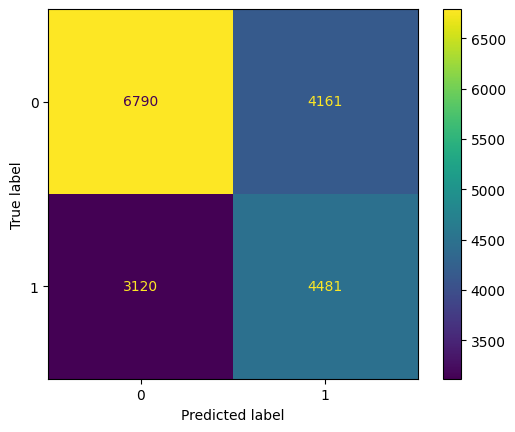

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.savefig("conf_matrix_BNB.png")
plt.show()

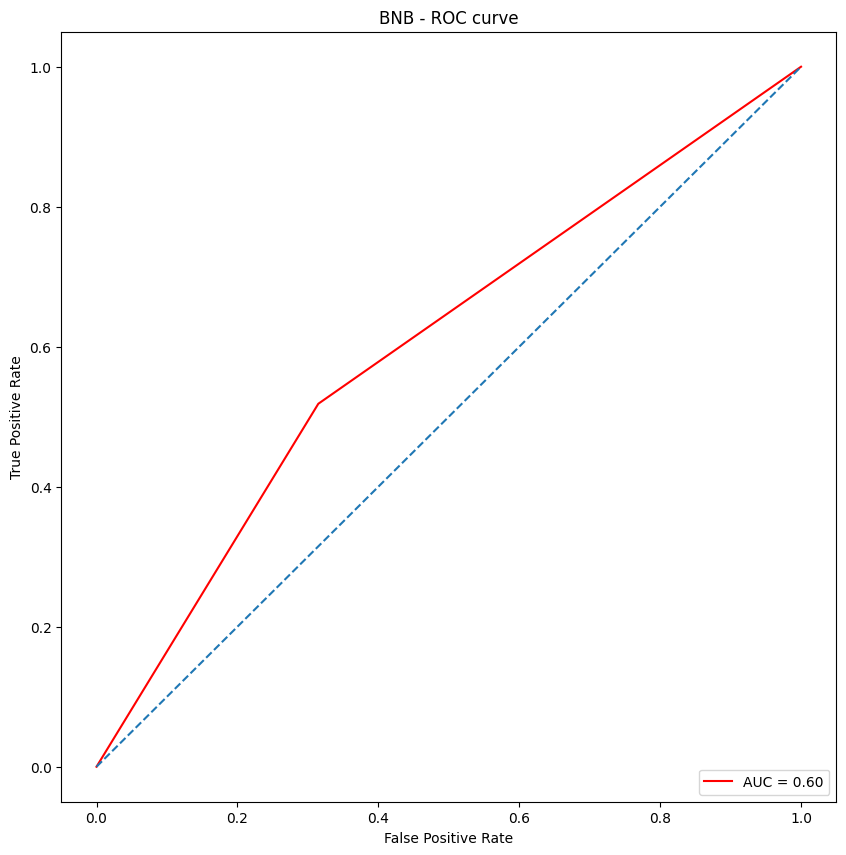

In [16]:
# Plot ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, Ypred)
auc_roc = roc_auc_score(testY, Ypred, average='weighted')
plt.figure(figsize=(10,10))
plt.title('BNB - ROC curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('auroc_BNB.png')

### MultinomialNB

In [17]:
from sklearn.naive_bayes import MultinomialNB
paramGrid = {'alpha': scipy.stats.expon(scale=1.0)}
Multinomial = MultinomialNB()
clf_multi = RandomizedSearchCV(Multinomial, paramGrid,n_iter=nIter,cv=crossV, n_jobs=jobs, verbose=10)
clf_multi.fit(Xtrain, trainY)
Ypred=clf_multi.predict(Xtest)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [18]:
print('Accuracy: {}\n'.format(accuracy_score(Ypred,testY)))
print('Precision: {}\n'.format(precision_score(Ypred,testY, average='weighted')))
print('Recall: {}\n'.format(recall_score(Ypred,testY, average='weighted')))
print('F-score: {}\n'.format(f1_score(Ypred,testY, average='weighted')))
print('\nConfusion matrix: \n')
print(str(confusion_matrix(Ypred,testY)) + '\n')
print('Classification report: \n')
print(classification_report(Ypred,testY) + '\n')
best_parameters = clf_multi.best_estimator_.get_params()
for params in sorted(best_parameters.keys()):
  print("\t%s: %r\n" % (params, best_parameters[params]))

Accuracy: 0.6071043553255714

Precision: 0.6151225086493489

Recall: 0.6071043553255714

F-score: 0.6095409000917301


Confusion matrix: 

[[6740 4119]
 [3170 4523]]

Classification report: 

              precision    recall  f1-score   support

           0       0.68      0.62      0.65     10859
           1       0.52      0.59      0.55      7693

    accuracy                           0.61     18552
   macro avg       0.60      0.60      0.60     18552
weighted avg       0.62      0.61      0.61     18552


	alpha: 4.6042442403283355

	class_prior: None

	fit_prior: True

	force_alpha: True



In [19]:
# Matriz de confusión
conf_matrix=confusion_matrix(Ypred,testY)
print(conf_matrix)

[[6740 4119]
 [3170 4523]]


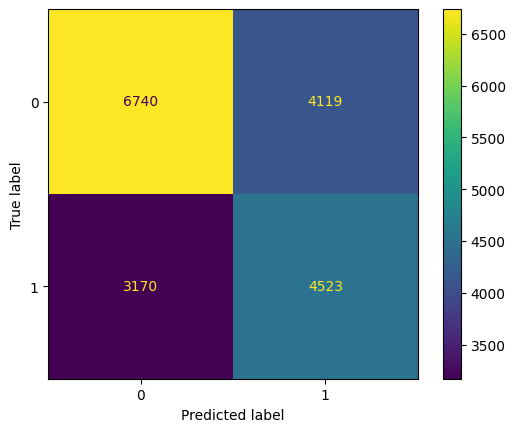

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.savefig("conf_matrix_MNB.png")
plt.show()

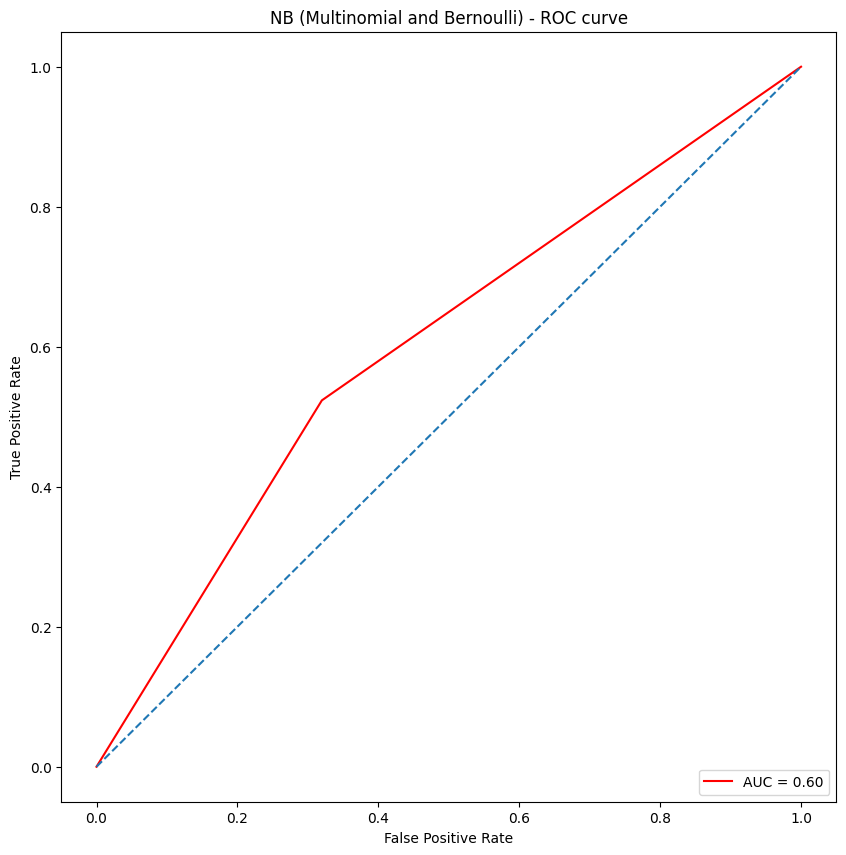

In [24]:
# Plot ROC curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, Ypred)
auc_roc = roc_auc_score(testY, Ypred, average='weighted')
plt.figure(figsize=(10,10))
plt.title('NB (Multinomial and Bernoulli) - ROC curve')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('auroc_MNB.png')